<a href="https://colab.research.google.com/github/Anweshasen98/Predictive-Maintenance-in-Aviation/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGRESSION ALGORITHMS

# Part 1 : Data Description

In [ ]:
import pandas as pd
df = pd.read_csv("train_selected.csv")
df.describe()

,id,cycle,s1,s2,s3,s4,ttf,label_bnc
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,1408.933782,553.367711,47.541168,521.413470,107.807862,0.150259
std,29.227633,68.880990,9.000605,0.885092,0.267087,0.737553,68.880990,0.357334
min,1.000000,1.000000,1382.250000,549.850000,46.850000,518.690000,0.000000,0.000000
25%,26.000000,52.000000,1402.360000,552.810000,47.350000,520.960000,51.000000,0.000000
50%,52.000000,104.000000,1408.040000,553.440000,47.510000,521.480000,103.000000,0.000000
75%,77.000000,156.000000,1414.555000,554.010000,47.700000,521.950000,155.000000,0.000000
max,100.000000,362.000000,1441.490000,556.060000,48.530000,523.380000,361.000000,1.000000


In [ ]:
df = df.drop(['id', 'label_bnc'], axis=1) # to drop ‘id’ & ‘label_bnc’ from data set
df.isnull().sum() # to check Null values in the Data Set

cycle    0
s1       0
s2       0
s3       0
s4       0
ttf      0
dtype: int64

# Part 2 : Pair Plot ( Exploratory Data Analysis)

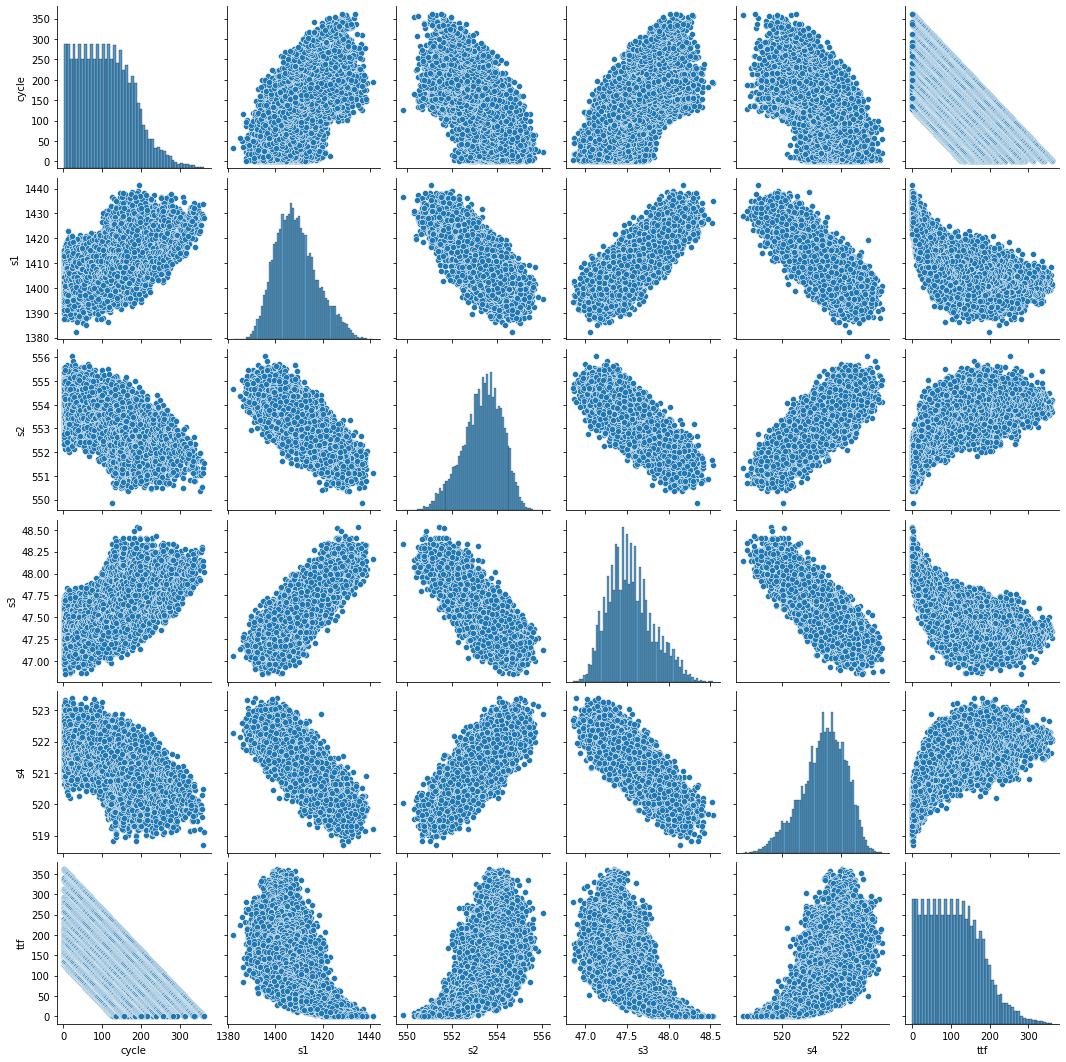

In [ ]:
import seaborn as sns
sns.pairplot(df)

# Part 3 : Correlation Matrix ( Exploratory Data Analysis)

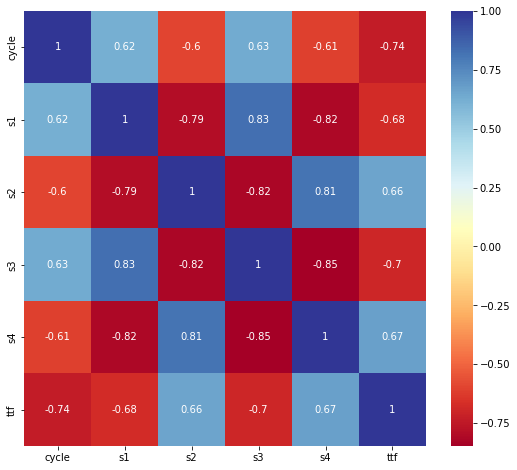

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(9,8))
corel = df.corr()
sns.heatmap(corel,annot = True, cmap = plt.cm.RdYlBu)
plt.show()

# Part 4 : Linear Regression Without Data Transformations

In [ ]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn import metrics

In [ ]:
df = pd.read_csv("train_selected.csv")
df = df.drop(['id', 'label_bnc'], axis=1)

x = df[['cycle','s1','s2','s3','s4']]
y = df[['ttf']]

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

R2_score_list = []
mae_list = []
mse_list = []
rmse_list = []

for train_index, test_index in kf.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index],y.iloc[train_index], y.iloc[test_index]

    model = linear_model.LinearRegression()
    model.fit(x_train,y_train)

    y_predictions = model.predict(x_test)

    R2_score = model.score(x_test,y_test)
    mae = metrics.mean_absolute_error(y_test, y_predictions )
    mse = metrics.mean_squared_error(y_test, y_predictions )
    rmse = np.sqrt(mse)

    R2_score_list.append(R2_score)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)

In [ ]:
R2_score_list =np.array(R2_score_list)
np.round(np.mean(R2_score_list),2)

0.65

In [ ]:
mae_list =np.array(mae_list)
np.round(np.mean(mae_list),2)

32.34

In [ ]:
mse_list =np.array(mse_list)
np.round(np.mean(mse_list),2)

1778.52

In [ ]:
rmse_list =np.array(rmse_list)
np.round(np.mean(rmse_list),2)

39.85

In [ ]:
df_truth = pd.read_csv("test_selected_ttf.csv")
df_truth = df_truth.drop(['id', 'label_bnc'], axis=1)

x_truth = df_truth[['cycle','s1','s2','s3','s4']]
y_truth = df_truth[['ttf']]

df_truth.head()

,cycle,s1,s2,s3,s4,ttf
0,31,1398.91,554.42,47.23,521.79,112
1,49,1410.83,553.52,47.67,521.74,98
2,126,1418.89,552.59,47.88,520.83,69
3,106,1406.88,552.64,47.65,521.88,82
4,98,1419.36,553.29,47.46,521.00,91


In [ ]:
x = df[['cycle','s1','s2','s3','s4']]
y = df['ttf']

model = linear_model.LinearRegression()
model.fit(x,y)


y_predictions = model.predict(x_truth)

R2_score = model.score(x_truth,y_truth)
mae = metrics.mean_absolute_error(y_truth, y_predictions )
mse = metrics.mean_squared_error(y_truth, y_predictions )
rmse = np.sqrt(mse)


In [ ]:
R2_score

0.39356878031496345

In [ ]:
mae

26.997979059568006

In [ ]:
mse

1047.227637765011

In [ ]:
rmse

32.360896739197614

Text(0, 0.5, 'Predicted Values')

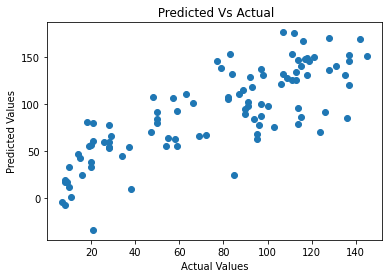

In [ ]:
plt.scatter(y_truth, y_predictions)
plt.title(" Predicted Vs Actual")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Part 5 : Square Root Transformation (Visual Representation)  

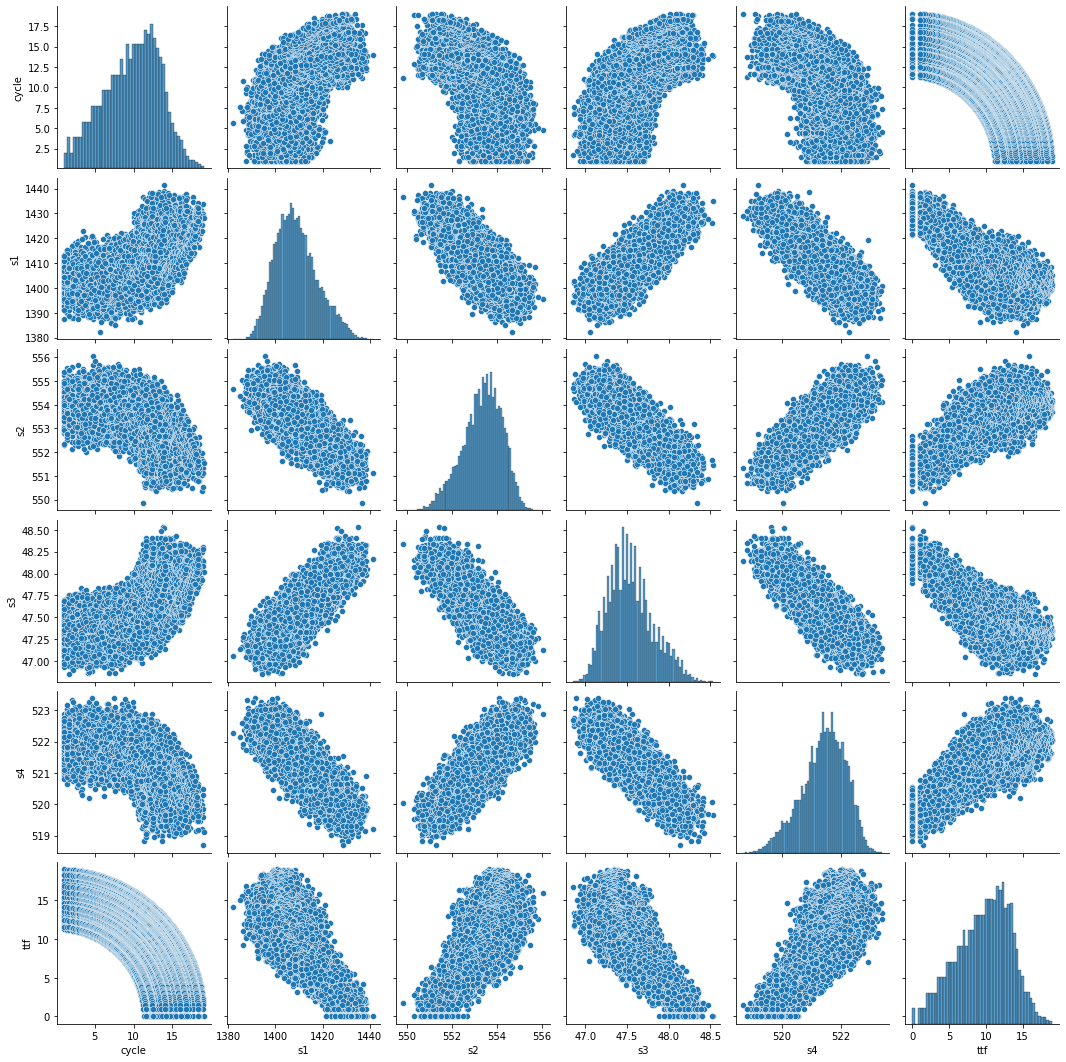

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("train_selected.csv")
df = df.drop(['id', 'label_bnc'], axis=1)

df['ttf'] = np.sqrt(df['ttf'])
df['cycle'] = np.sqrt(df['cycle'])

import seaborn as sns
sns.pairplot(df)

# Part 6 Linear Regression With Data Transformations

In [ ]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn import metrics

# Square Root Transformations

In [ ]:
df = pd.read_csv("train_selected.csv")
df = df.drop(['id', 'label_bnc'], axis=1)

df['ttf'] = np.sqrt(df['ttf'])              # Square Root of 'ttf' variable
df['cycle'] = np.sqrt(df['cycle'])          # Square Root of 'cycle' variable

x = df[['cycle','s1','s2','s3','s4']]
y = df[['ttf']]


# Standard Scaler Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x)
x.columns =['cycle','s1','s2','s3','s4']

scaler.fit(y)
y = scaler.transform(y)
y = pd.DataFrame(y)
y.columns = ['ttf']


# K-Fold (10) Cross Validation

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

R2_score_list = []
mae_list = []
mse_list = []
rmse_list = []

for train_index, test_index in kf.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index],y.iloc[train_index], y.iloc[test_index]
    model = linear_model.LinearRegression()
    model.fit(x_train,y_train)

    y_predictions = model.predict(x_test)

    y_predictions = scaler.inverse_transform(y_predictions)
    y_predictions = np.square(y_predictions)

    y_test = scaler.inverse_transform(y_test)
    y_test = np.square(y_test)

    from sklearn.metrics import r2_score

    R2_score = r2_score(y_test, y_predictions)


    mae = metrics.mean_absolute_error(y_test, y_predictions )
    mse = metrics.mean_squared_error(y_test, y_predictions )
    rmse = np.sqrt(mse)

    R2_score_list.append(R2_score)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)


In [ ]:
R2_score_list =np.array(R2_score_list)
np.round(np.mean(R2_score_list),2)     # Mean R2-Score

0.67

In [ ]:
mae_list =np.array(mae_list)
np.round(np.mean(mae_list),2)            # Mean MAE

29.61

In [ ]:
se_list =np.array(mse_list)
np.round(np.mean(mse_list),2)            # Mean MSE

1685.49

In [ ]:
rmse_list =np.array(rmse_list)
np.round(np.mean(rmse_list),2)           # Mean RMSE

38.58

In [ ]:
df_truth = pd.read_csv("test_selected_ttf.csv")
df_truth = df_truth.drop(['id', 'label_bnc'], axis=1)

y_actual_truth = df_truth[['ttf']]

df_truth['ttf'] = np.sqrt(df_truth['ttf'])
df_truth['cycle'] = np.sqrt(df_truth['cycle'])

x_truth = df_truth[['cycle','s1','s2','s3','s4']]
y_truth = df_truth[['ttf']]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_truth)
x_truth = scaler.transform(x_truth)
x_truth = pd.DataFrame(x_truth)
x_truth.columns = ['cycle','s1','s2','s3','s4']

scaler.fit(y_truth)
y_truth = scaler.transform(y_truth)
y_truth = pd.DataFrame(y_truth)
y_truth.columns = ['ttf']


In [ ]:
model = linear_model.LinearRegression()
model.fit(x,y)


y_predictions = model.predict(x_truth)

y_predictions = scaler.inverse_transform(y_predictions)
y_predictions = np.square(y_predictions)

from sklearn.metrics import r2_score

R2_score = r2_score(y_actual_truth, y_predictions)
mae = metrics.mean_absolute_error(y_actual_truth, y_predictions )
mse = metrics.mean_squared_error(y_actual_truth, y_predictions )
rmse = np.sqrt(mse)


# Performance on 'Truth' Data

In [ ]:
R2_score

0.6044648178101406

In [ ]:
mae

20.351366403368402

In [ ]:
mse

683.0376818541295

In [ ]:
rmse

26.134989608839135

Text(0, 0.5, 'Predicted Values')

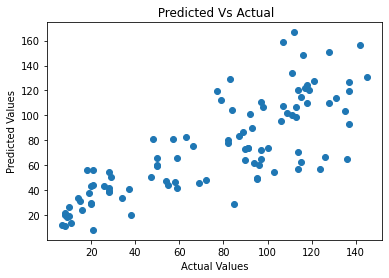

In [ ]:
plt.scatter(y_actual_truth, y_predictions)
plt.title(" Predicted Vs Actual")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Part 7 Ploynomial Regression (Data used -Transformed and Standardised)

In [ ]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn import metrics

In [ ]:
df = pd.read_csv("train_selected.csv")
df = df.drop(['id', 'label_bnc'], axis=1)

df['ttf'] = np.sqrt(df['ttf'])              # Square Root of 'ttf' variable
df['cycle'] = np.sqrt(df['cycle'])          # Square Root of 'cycle' variable

x = df[['cycle','s1','s2','s3','s4']]
y = df[['ttf']]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x)
x.columns =['cycle','s1','s2','s3','s4']

scaler.fit(y)
y = scaler.transform(y)
y = pd.DataFrame(y)
y.columns = ['ttf']


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

R2_score_list = []
mae_list = []
mse_list = []
rmse_list = []

from sklearn.preprocessing import PolynomialFeatures

for train_index, test_index in kf.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index],y.iloc[train_index], y.iloc[test_index]

    poly = PolynomialFeatures(degree = 3)
    x_train, x_test = poly.fit_transform(x_train), poly.fit_transform(x_test)

    model = linear_model.LinearRegression()
    model.fit(x_train,y_train)

    y_predictions = model.predict(x_test)



    y_predictions = scaler.inverse_transform(y_predictions)
    y_predictions = np.square(y_predictions)

    y_test = scaler.inverse_transform(y_test)
    y_test = np.square(y_test)

    from sklearn.metrics import r2_score

    R2_score = r2_score(y_test, y_predictions)


    mae = metrics.mean_absolute_error(y_test, y_predictions )
    mse = metrics.mean_squared_error(y_test, y_predictions )
    rmse = np.sqrt(mse)

    R2_score_list.append(R2_score)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)


In [ ]:
R2_score_list =np.array(R2_score_list)
np.round(np.mean(R2_score_list),2)

0.71

In [ ]:
mae_list =np.array(mae_list)
np.round(np.mean(mae_list),2)

27.37

In [ ]:
mse_list =np.array(mse_list)
np.round(np.mean(mse_list),2)

1495.16

In [ ]:
rmse_list =np.array(rmse_list)
np.round(np.mean(rmse_list),2)

36.12

In [ ]:
df_truth = pd.read_csv("test_selected_ttf.csv")
df_truth = df_truth.drop(['id', 'label_bnc'], axis=1)

y_actual_truth = df_truth[['ttf']]

df_truth['ttf'] = np.sqrt(df_truth['ttf'])
df_truth['cycle'] = np.sqrt(df_truth['cycle'])

x_truth = df_truth[['cycle','s1','s2','s3','s4']]
y_truth = df_truth[['ttf']]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_truth)
x_truth = scaler.transform(x_truth)
x_truth = pd.DataFrame(x_truth)
x_truth.columns = ['cycle','s1','s2','s3','s4']

scaler.fit(y_truth)
y_truth = scaler.transform(y_truth)
y_truth = pd.DataFrame(y_truth)
y_truth.columns = ['ttf']


In [ ]:
poly = PolynomialFeatures(degree = 3)
x  = poly.fit_transform(x)

model = linear_model.LinearRegression()
model.fit(x,y)

poly = PolynomialFeatures(degree =3)
x_truth = poly.fit_transform(x_truth)


y_predictions = model.predict(x_truth)

y_predictions = scaler.inverse_transform(y_predictions)
y_predictions = np.square(y_predictions)

from sklearn.metrics import r2_score

R2_score = r2_score(y_actual_truth, y_predictions)
mae = metrics.mean_absolute_error(y_actual_truth, y_predictions )
mse = metrics.mean_squared_error(y_actual_truth, y_predictions )
rmse = np.sqrt(mse)


In [ ]:
R2_score

0.6639511681778705

In [ ]:
mae

18.861793926092844

In [ ]:
mse

580.312511789148

In [ ]:
rmse

24.089676456713732

Text(0, 0.5, 'Predicted Values')

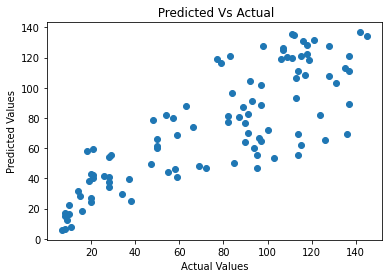

In [ ]:
plt.scatter(y_actual_truth, y_predictions)
plt.title(" Predicted Vs Actual")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Part 8: SVM Regression (Data used -Transformed and Standardised)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.svm import SVR

In [ ]:
df = pd.read_csv("train_selected.csv")
df = df.drop(['id', 'label_bnc'], axis=1)

df['ttf'] = np.sqrt(df['ttf'])              # Square Root of 'ttf' variable
df['cycle'] = np.sqrt(df['cycle'])          # Square Root of 'cycle' variable

x = df[['cycle','s1','s2','s3','s4']]
y = df[['ttf']]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x)
x = scaler.transform(x)
x = pd.DataFrame(x)
x.columns =['cycle','s1','s2','s3','s4']

scaler.fit(y)
y = scaler.transform(y)
y = pd.DataFrame(y)
y.columns = ['ttf']


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

R2_score_list = []
mae_list = []
mse_list = []
rmse_list = []


for train_index, test_index in kf.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index],y.iloc[train_index], y.iloc[test_index]



    model = SVR(kernel = 'rbf')
    model.fit(x_train,y_train.values.ravel())

    y_predictions = model.predict(x_test)

    y_predictions = np.reshape(y_predictions, (-1, 1))

    y_predictions = scaler.inverse_transform(y_predictions)
    y_predictions = np.square(y_predictions)

    y_test = scaler.inverse_transform(y_test)
    y_test = np.square(y_test)

    from sklearn.metrics import r2_score

    R2_score = r2_score(y_test, y_predictions)

    mae = metrics.mean_absolute_error(y_test, y_predictions )
    mse = metrics.mean_squared_error(y_test, y_predictions )
    rmse = np.sqrt(mse)

    R2_score_list.append(R2_score)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)


In [ ]:
R2_score_list =np.array(R2_score_list)
np.round(np.mean(R2_score_list),2)

0.71

In [ ]:
mae_list =np.array(mae_list)
np.round(np.mean(mae_list),2)        # Mean MAE

26.68

In [ ]:
mse_list =np.array(mse_list)
np.round(np.mean(mse_list),2)         # Mean MSE

1535.64

In [ ]:
rmse_list =np.array(rmse_list)
np.round(np.mean(rmse_list),2)         # Mean RMSE

36.04

In [ ]:
df_truth = pd.read_csv("test_selected_ttf.csv")
df_truth = df_truth.drop(['id', 'label_bnc'], axis=1)

y_actual_truth = df_truth[['ttf']]

df_truth['ttf'] = np.sqrt(df_truth['ttf'])
df_truth['cycle'] = np.sqrt(df_truth['cycle'])

x_truth = df_truth[['cycle','s1','s2','s3','s4']]
y_truth = df_truth[['ttf']]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_truth)
x_truth = scaler.transform(x_truth)
x_truth = pd.DataFrame(x_truth)
x_truth.columns = ['cycle','s1','s2','s3','s4']

scaler.fit(y_truth)
y_truth = scaler.transform(y_truth)
y_truth = pd.DataFrame(y_truth)
y_truth.columns = ['ttf']


In [ ]:

model = SVR(kernel = 'rbf')
model.fit(x,y.values.ravel())

y_predictions = model.predict(x_truth)

y_predictions = np.reshape(y_predictions, (-1, 1))

y_predictions = scaler.inverse_transform(y_predictions)
y_predictions = np.square(y_predictions)

from sklearn.metrics import r2_score

R2_score = r2_score(y_actual_truth, y_predictions)
mae = metrics.mean_absolute_error(y_actual_truth, y_predictions )
mse = metrics.mean_squared_error(y_actual_truth, y_predictions )
rmse = np.sqrt(mse)


In [ ]:
R2_score

0.6300204501621545

In [ ]:
mae

18.922342856610427

In [ ]:
mse

638.9064372366602

In [ ]:
rmse

25.27659860892403

Text(0, 0.5, 'Predicted Values')

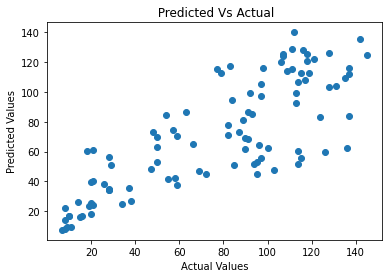

In [ ]:
plt.scatter(y_actual_truth, y_predictions)
plt.title(" Predicted Vs Actual")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Part 9:  Random Forest Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [ ]:
df = pd.read_csv("train_selected.csv")
df = df.drop(['id', 'label_bnc'], axis=1)

x = df[['cycle','s1','s2','s3','s4']]
y = df[['ttf']]

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

from sklearn.ensemble import RandomForestRegressor

R2_score_list = []
mae_list = []
mse_list = []
rmse_list = []

for train_index, test_index in kf.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index],y.iloc[train_index], y.iloc[test_index]

    model = RandomForestRegressor()
    model.fit(x_train,y_train.values.ravel())

    y_predictions = model.predict(x_test)

    R2_score = model.score(x_test,y_test)
    mae = metrics.mean_absolute_error(y_test, y_predictions )
    mse = metrics.mean_squared_error(y_test, y_predictions )
    rmse = np.sqrt(mse)

    R2_score_list.append(R2_score)
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)

In [ ]:
R2_score_list =np.array(R2_score_list)
np.round(np.mean(R2_score_list),2)

0.68

In [ ]:
mae_list =np.array(mae_list)
np.round(np.mean(mae_list),2)

29.08

In [ ]:
mse_list =np.array(mse_list)
np.round(np.mean(mse_list),2)

1611.36

In [ ]:
rmse_list =np.array(rmse_list)
np.round(np.mean(rmse_list),2)

38.21

In [ ]:
df_truth = pd.read_csv("test_selected_ttf.csv")
df_truth = df_truth.drop(['id', 'label_bnc'], axis=1)

x_truth = df_truth[['cycle','s1','s2','s3','s4']]
y_truth = df_truth[['ttf']]

df_truth.head()

,cycle,s1,s2,s3,s4,ttf
0,31,1398.91,554.42,47.23,521.79,112
1,49,1410.83,553.52,47.67,521.74,98
2,126,1418.89,552.59,47.88,520.83,69
3,106,1406.88,552.64,47.65,521.88,82
4,98,1419.36,553.29,47.46,521.00,91


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x,y.values.ravel())

y_predictions = model.predict(x_truth)

R2_score = model.score(x_truth,y_truth)
mae = metrics.mean_absolute_error(y_truth, y_predictions )
mse = metrics.mean_squared_error(y_truth, y_predictions )
rmse = np.sqrt(mse)


In [ ]:
R2_score

0.5142836094862056

In [ ]:
mae

22.8981

In [ ]:
mse

838.768869

In [ ]:
rmse

28.96150667696693

Text(0, 0.5, 'Predicted Values')

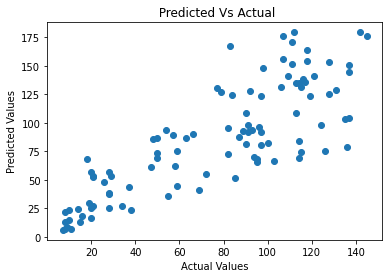

In [ ]:
plt.scatter(y_truth, y_predictions)
plt.title(" Predicted Vs Actual")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')